# Section 12

### Geodemographic Segmentation

### VIF
- Can help us understand the multicolinearity of variables. We are not told which variables but it does provide insight on how correlated a variable is in a model
    - 1 = not correlated.
    - Between 1 and 5 = moderately correlated.
    - Greater than 5 = highly correlated.

In [17]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

import BackwardElimination

PATH = './archive/'

In [18]:
def vif(features):
    vif = pd.DataFrame()
    
    vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif["features"] = features.columns
    print(vif)

In [44]:
vif(features_3)

   VIF Factor             features
0   20.258148          CreditScore
1   16.131446                  Age
2    7.878552        NumOfProducts
3    2.077322       IsActiveMember
4    1.823037               Female
5    1.689429              Germany
6   15.976575          Log_Balance
7   12.090986  Wealth_Accumulation


In [46]:
features_3.values

array([[6.19000000e+02, 4.20000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.08000000e+02, 4.10000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 1.13362940e+01, 2.04409415e+03],
       [5.02000000e+02, 4.20000000e+01, 3.00000000e+00, ...,
        0.00000000e+00, 1.19808131e+01, 3.80144762e+03],
       ...,
       [7.09000000e+02, 3.60000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.72000000e+02, 4.20000000e+01, 2.00000000e+00, ...,
        1.00000000e+00, 1.12262603e+01, 1.78750738e+03],
       [7.92000000e+02, 2.80000000e+01, 1.00000000e+00, ...,
        0.00000000e+00, 1.17763952e+01, 4.64795679e+03]])

In [19]:
df_test = pd.read_csv(PATH+"ChurnModellingTestData.csv")
df_train = pd.read_csv(PATH+"ChurnModelling.csv")

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df_test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08,0
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90,0
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67,0
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10,0
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15,0


In [22]:
gender_dummy = pd.get_dummies(df_train['Gender'])
df_train = pd.concat([df_train, gender_dummy], axis=1)
df_train.drop(['Gender', 'Male'], axis=1, inplace=True) 

df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1


In [23]:
geo_dummy = pd.get_dummies(df_train['Geography'])
df_train = pd.concat([df_train, geo_dummy], axis=1)
df_train.drop(['Geography', 'France'], axis=1, inplace=True) 

df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1


In [24]:
features = df_train[['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard',
                     'IsActiveMember','EstimatedSalary','Female','Germany','Spain']]

y = df_train['Exited']

In [25]:
model = BackwardElimination.create_logreg(features, y)
model.summary2()

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: Exited           Pseudo R-squared: 0.153    
Date:               2018-06-02 15:39 AIC:              8585.3554
No. Observations:   10000            BIC:              8671.8795
Df Model:           11               Log-Likelihood:   -4280.7  
Df Residuals:       9988             LL-Null:          -5054.9  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -3.9208   0.2454 -15.9801 0.0000 -4.4016 -3.4399
CreditScore     -0.0007   0.0003  -2.3840 0.0171 -0.0012 -0.0001
Age              0.0727   0.0026  28.2298 0.0000  0.0677  0.0778
Tenure          -0.0159   0.0094  -1.7049 0.0882 -0.0343  0.0024
Balance          0.0000   0.0000   5.1284 0.0000  0.0000  0.0000
NumOfProducts   -0.1015   0.0471  -2.1539 0.0312 -0.1939 -0.0091
HasCrCard       -0.0447   0.0593  -0.7529 0.4515 -0.1610  0.0716
IsActiveMember  -1.0754   0.0577 -18.6432 0.0000 -1.1885 -0.9624
EstimatedSalary  0.0000   0.0000   1.0149 0.3102 -0.0000  0.0000
Female           0.5285   0.0545   9.6990 0.0000  0.4217  0.6353
Germany          0.7747   0.0677  11.4477 0.0000  0.6421  0.9074
Spain            0.0352   0.0706   0.4986 0.6181 -0.1032  0.1737
================================================================

"""

- Spain has the highest p-value!

In [27]:
stats_signf = 0.05
final_model = BackwardElimination.backward_elimination(features, y, stats_signf, model='Logistic')

final_model.summary2()

Optimization terminated successfully.
         Current function value: 0.428307
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: Exited           Pseudo R-squared: 0.153    
Date:               2018-06-02 15:39 AIC:              8582.1344
No. Observations:   10000            BIC:              8639.8171
Df Model:           7                Log-Likelihood:   -4283.1  
Df Residuals:       9992             LL-Null:          -5054.9  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -3.9760   0.2312 -17.1999 0.0000 -4.4291 -3.5229
CreditScore     -0.0007   0.0003  -2.3770 0.0175 -0.0012 -0.0001
Age              0.0727   0.0026  28.2373 0.0000  0.0676  0.0777
Balance          0.0000   0.0000   5.1604 0.0000  0.0000  0.0000
NumOfProducts   -0.1010   0.0471  -2.1444 0.0320 -0.1933 -0.0087
IsActiveMember  -1.0718   0.0576 -18.6029 0.0000 -1.1847 -0.9589
Female           0.5306   0.0545   9.7414 0.0000  0.4238  0.6373
Germany          0.7608   0.0633  12.0138 0.0000  0.6367  0.8850
================================================================

"""

In [28]:
VARS_FOR_MODELS = ['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','Female','Germany']
features_2 = df_train[VARS_FOR_MODELS]

In [29]:
df_train['Log_Balance'] = np.log(df_train['Balance'] + 1)
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Germany,Spain,Log_Balance
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0.000000
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,11.336294
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,11.980813
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0.000000
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,11.740155


In [30]:
# Replacing log for balance instead

features_2 = pd.concat([features_2,df_train['Log_Balance']], axis=1)
features_2.drop('Balance',axis=1, inplace=True)

features_2.head()

,CreditScore,Age,NumOfProducts,IsActiveMember,Female,Germany,Log_Balance
0,619,42,1,1,1,0,0.000000
1,608,41,1,1,1,0,11.336294
2,502,42,3,0,1,0,11.980813
3,699,39,2,0,1,0,0.000000
4,850,43,1,1,1,0,11.740155


In [34]:
model_2 = BackwardElimination.create_logreg(features_2, y)
model_2.summary2()

Optimization terminated successfully.
         Current function value: 0.428401
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: Exited           Pseudo R-squared: 0.153    
Date:               2018-06-02 15:40 AIC:              8584.0290
No. Observations:   10000            BIC:              8641.7118
Df Model:           7                Log-Likelihood:   -4284.0  
Df Residuals:       9992             LL-Null:          -5054.9  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -3.9924   0.2326 -17.1630 0.0000 -4.4483 -3.5365
CreditScore     -0.0007   0.0003  -2.4067 0.0161 -0.0012 -0.0001
Age              0.0726   0.0026  28.2203 0.0000  0.0676  0.0777
NumOfProducts   -0.0955   0.0475  -2.0100 0.0444 -0.1886 -0.0024
IsActiveMember  -1.0725   0.0576 -18.6210 0.0000 -1.1854 -0.9596
Female           0.5283   0.0544   9.7036 0.0000  0.4216  0.6350
Germany          0.7463   0.0650  11.4749 0.0000  0.6188  0.8738
Log_Balance      0.0300   0.0061   4.9466 0.0000  0.0181  0.0419
================================================================

"""

In [35]:
vif(features_2)

   VIF Factor        features
0   18.213836     CreditScore
1   12.147749             Age
2    7.795316   NumOfProducts
3    2.074164  IsActiveMember
4    1.822808          Female
5    1.684154         Germany
6    3.660435     Log_Balance


In [37]:
df_train['Wealth_Accumulation'] = df_train.Balance/df_train.Age

# Adding a new variable that can help us look at the information
# from the balance people make at a certain age
features_3 = pd.concat([features_2,df_train['Wealth_Accumulation']], axis=1)

model_3 = BackwardElimination.create_logreg(features_3, y)
model_3.summary2()

Optimization terminated successfully.
         Current function value: 0.428336
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:                Logit             No. Iterations:    6.0000   
Dependent Variable:   Exited            Pseudo R-squared:  0.153    
Date:                 2018-06-02 15:40  AIC:               8584.7201
No. Observations:     10000             BIC:               8649.6131
Df Model:             8                 Log-Likelihood:    -4283.4  
Df Residuals:         9991              LL-Null:           -5054.9  
Converged:            1.0000            Scale:             1.0000   
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -3.9082   0.2438 -16.0308 0.0000 -4.3860 -3.4303
CreditScore         -0.0007   0.0003  -2.4086 0.0160 -0.0012 -0.0001
Age                  0.0707   0.0031  22.8392 0.0000  0.0646  0.0767
NumOfProducts       -0.0960   0.0475  -2.0199 0.0434 -0.1892 -0.0028
IsActiveMember      -1.0702   0.0576 -18.5713 0.0000 -1.1831 -0.9572
Female               0.5273   0.0545   9.6827 0.0000  0.4206  0.6340
Germany              0.7450   0.0651  11.4413 0.0000  0.6174  0.8727
Log_Balance          0.0412   0.0116   3.5668 0.0004  0.0186  0.0639
Wealth_Accumulation -0.0000   0.0000  -1.1402 0.2542 -0.0001  0.0000
====================================================================

"""

In [38]:
vif(features_3)

   VIF Factor             features
0   20.258148          CreditScore
1   16.131446                  Age
2    7.878552        NumOfProducts
3    2.077322       IsActiveMember
4    1.823037               Female
5    1.689429              Germany
6   15.976575          Log_Balance
7   12.090986  Wealth_Accumulation


In [40]:
features_4 = features_2.drop('Log_Balance', axis=1)

model_3 = BackwardElimination.create_logreg(features_4, y)
model_3.summary2()

Optimization terminated successfully.
         Current function value: 0.429635
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: Exited           Pseudo R-squared: 0.150    
Date:               2018-06-02 15:40 AIC:              8606.6945
No. Observations:   10000            BIC:              8657.1669
Df Model:           6                Log-Likelihood:   -4296.3  
Df Residuals:       9993             LL-Null:          -5054.9  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -3.6860   0.2236 -16.4868 0.0000 -4.1241 -3.2478
CreditScore     -0.0007   0.0003  -2.3902 0.0168 -0.0012 -0.0001
Age              0.0724   0.0026  28.1957 0.0000  0.0674  0.0775
NumOfProducts   -0.1672   0.0456  -3.6649 0.0002 -0.2565 -0.0778
IsActiveMember  -1.0693   0.0575 -18.5853 0.0000 -1.1820 -0.9565
Female           0.5225   0.0544   9.6139 0.0000  0.4160  0.6291
Germany          0.9034   0.0575  15.7063 0.0000  0.7907  1.0162
================================================================

"""

In [41]:
vif(features_4)

   VIF Factor        features
0   15.972169     CreditScore
1   11.930786             Age
2    7.124511   NumOfProducts
3    2.072956  IsActiveMember
4    1.822516          Female
5    1.336626         Germany


In [42]:
features_5 = features_4.drop('Age',axis=1)
vif(features_5)

   VIF Factor        features
0    8.555489     CreditScore
1    6.999989   NumOfProducts
2    2.037379  IsActiveMember
3    1.811533          Female
4    1.328667         Germany


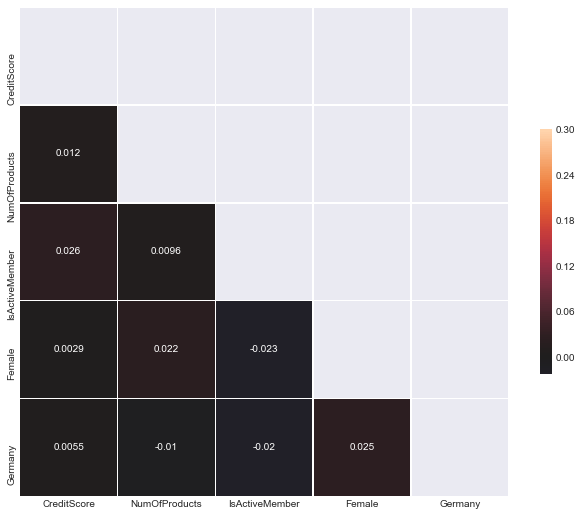

In [43]:
# Compute the correlation matrix
corr = features_5.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
## FINAL MODEL
# Might add tenure?

features_2.columns